In [14]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
df_fan_features = pd.read_csv("Features/df_fan_feature.csv")
df_fan_features.head()

0         1         2         3             4         5         6  \
0  0.321765  0.993920  0.587307  0.227931  3.682876e-07  0.454453  0.012064   
1  0.324179  0.997664  0.575122  0.233173  5.033161e-07  0.581692  0.015197   
2  0.309565  0.992410  0.583972  0.245409  3.053722e-07  0.515054  0.013476   
3  0.321053  0.994196  0.576258  0.235442  3.724527e-08  0.570727  0.015205   
4  0.347573  0.981656  0.593205  0.225728  9.834761e-08  0.491109  0.013466   

          7           8           9  ...        19        20        21  \
0  0.059049 -439.074188  151.212128  ...  0.018938  0.002594  0.006821   
1  0.076022 -440.888489  155.448624  ...  0.021426  0.003007  0.007374   
2  0.067214 -440.551361  152.642548  ...  0.020326  0.002495  0.007279   
3  0.074875 -448.646210  170.903778  ...  0.020827  0.002560  0.007297   
4  0.065463 -442.838745  163.274231  ...  0.019928  0.002771  0.007218   

         22        23        24        25        26        27        28  
0  0.011630  0.009338  0.001038  0.008301  0.038574  0.022062  0.004880  
1  0.013181  0.010397  0.001020  0.009766  0.031738  0.019542  0.003963  
2  0.012313  0.009822  0.000860  0.009766  0.034668  0.020863  0.004406  
3  0.013035  0.010333  0.001054  0.006348  0.028809  0.015656  0.003357  
4  0.013747  0.009737  0.001146  0.004883  0.028320  0.016588  0.003945  

[5 rows x 29 columns]

In [16]:
df_fan_target = pd.read_csv("Features/df_fan_target.csv")
df_fan_target.tail()

0
16645  1
16646  1
16647  1
16648  1
16649  1

In [17]:
X = df_fan_features
y = df_fan_target.values.ravel()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

In [19]:
from sklearn.ensemble import RandomForestClassifier
####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 99.99%
Default Random Forest Model's accuracy on test set is 93.96%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 94.08%


In [20]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.88       880
           1       0.93      0.99      0.96      2450

    accuracy                           0.94      3330
   macro avg       0.95      0.89      0.92      3330
weighted avg       0.94      0.94      0.94      3330



In [21]:
from sklearn.metrics import plot_roc_curve

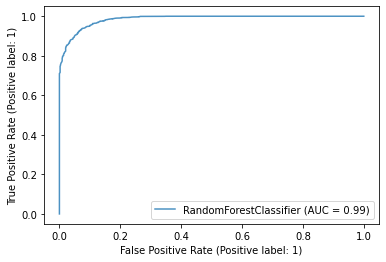

In [22]:
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)

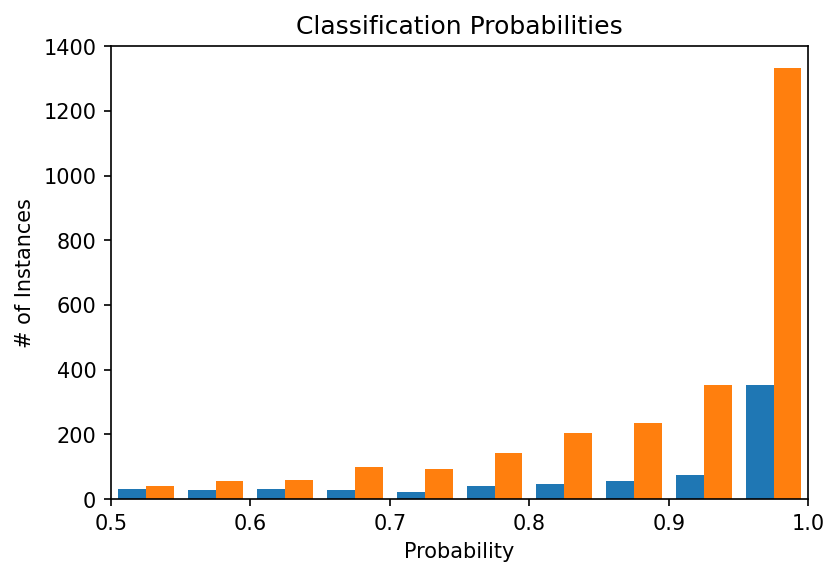

In [23]:
# predict probabilities
probas = model.predict_proba(X_test)

# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

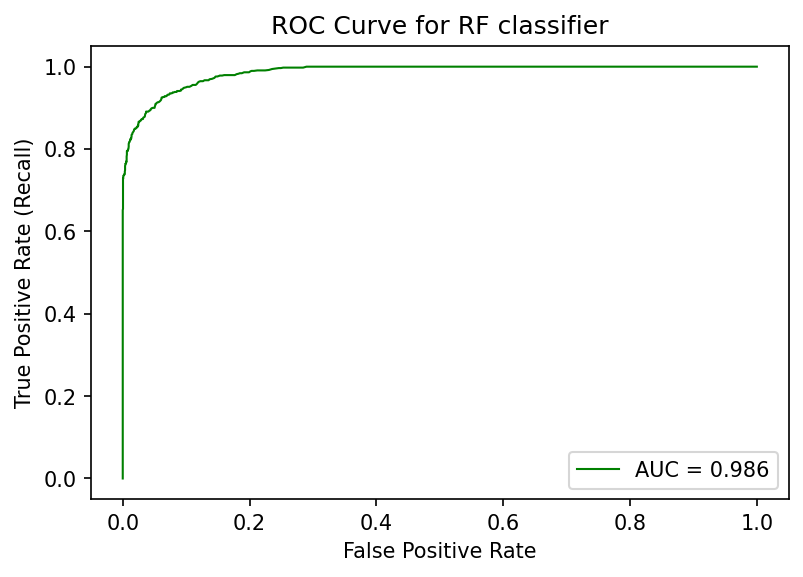

In [24]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

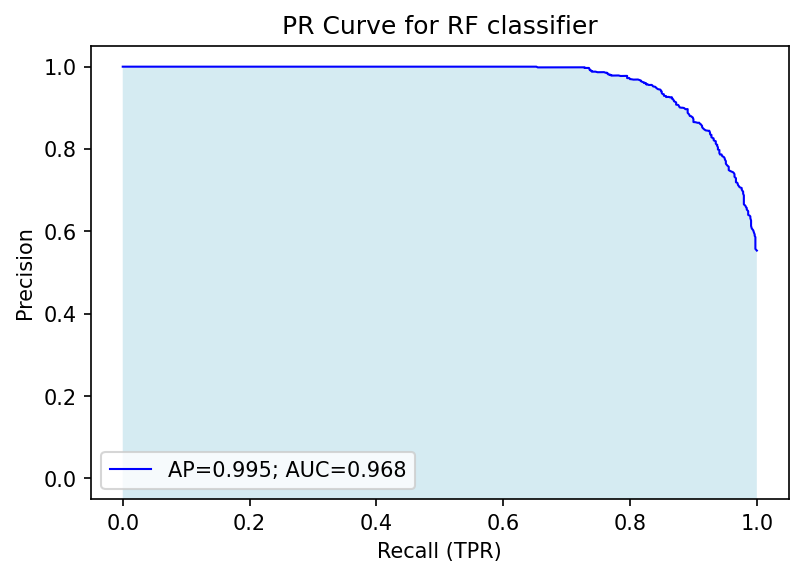

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()